In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter
from sklearn.manifold import TSNE
import plotly.express as px

In [26]:
path_to_read_data = "../Data/cleaned_v1.csv"
data = pd.read_csv(path_to_read_data)
data

,Unnamed: 0,Content,Label,Content_cleaned,Length_content_cleaned
0,0,Sao Việt ngày 29/3: NSƯT Chí Trung cùng bạn gá...,entertainment,việt nsưt chí_trung gái đi du_lịch mỹ ...,21
1,1,Người tiêu dùng trẻ ngày càng có xu hướng chi ...,business,tiêu_dùng trẻ xu_hướng chi_tiêu thông_minh tận...,311
2,2,Trong khuôn viên rất rộng ở khu liên hợp thể t...,sport,khuôn_viên rộng khu liên_hợp thể_thao techo mo...,253
3,3,Một trong những triệu chứng điển hình của tiểu...,health,triệu_chứng điển_hình tiểu tần_suất đi_tiểu nư...,287
4,4,"Từ ngày 27/2-2/3, Hiệp hội golf Việt Nam tổ ch...",sport,hiệp_hội golf việt_nam tổ_chức vòng_lo...,105
...,...,...,...,...,...
24409,2920,"Ở nội dung đôi nam nữ, Trần Ngọc Thúy Vi và Lê...",sport,nội_dung đôi nam_nữ trần_ngọc thúy_vi lê_hoà...,149
24410,2924,Nguồn: Next Sports Thiên Bình,sport,next sports thiên_bình,3
24411,2925,Nhận định trận đấu giữa Arsenal vs Brighton Tr...,sport,nhận_định trận_đấu arsenal vs brighton khuôn_k...,156
24412,2926,Dù giành chiến thắng trước Myanmar ở vòng bảng...,sport,giành chiến_thắng myanmar vòng bảng hlv mai_đứ...,138


In [ ]:
# tf_idf = TfidfVectorizer(min_df=2)
# tf_idf_pre = tf_idf.fit_transform(data["Content"])

In [ ]:


# tsne = TSNE(n_components=3, random_state=0)
# projections = tsne.fit_transform(tf_idf_pre, )

# fig = px.scatter_3d(
#     projections, x=0, y=1, z=2,
#     color=data.label, labels={'color': 'Label'}
# )
# fig.update_traces(marker_size=4)
# fig.show()


In [ ]:
# data["Labels"] = data["Label"]
# data["Contents"] = data["Content"]
# data = data.drop(["Label", "Content"], axis= 1)

In [27]:
import visualizing
visualier = visualizing.Visualizer(data)

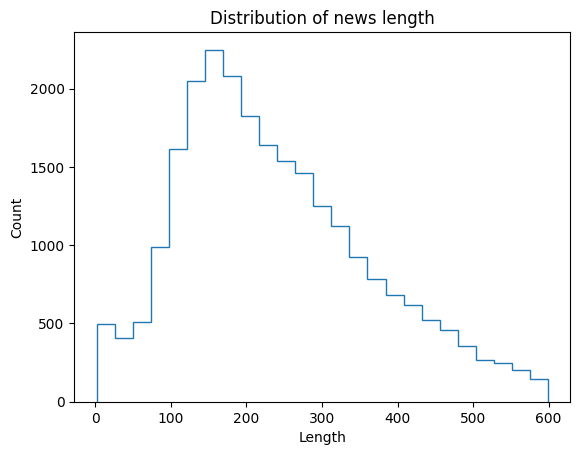

In [28]:
visualier.hist_length("Content_cleaned", True)

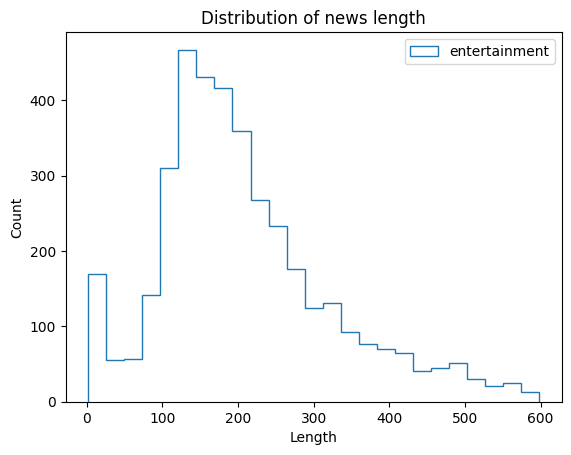

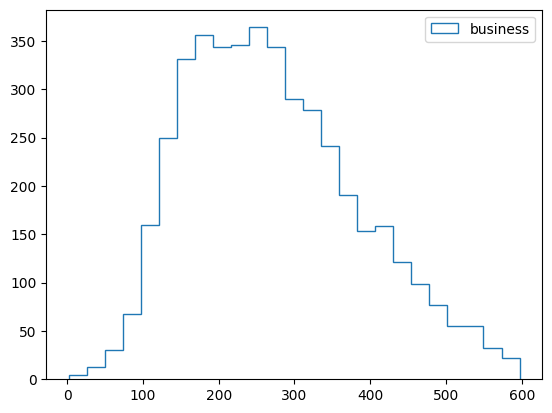

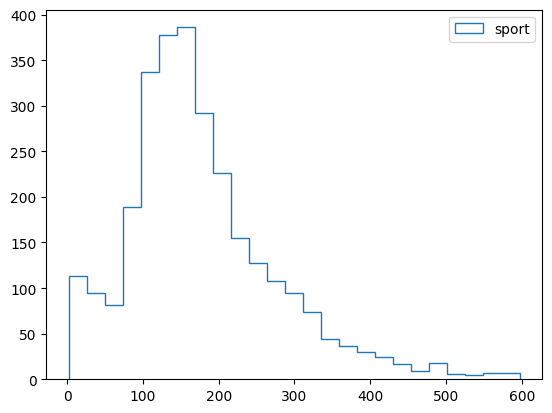

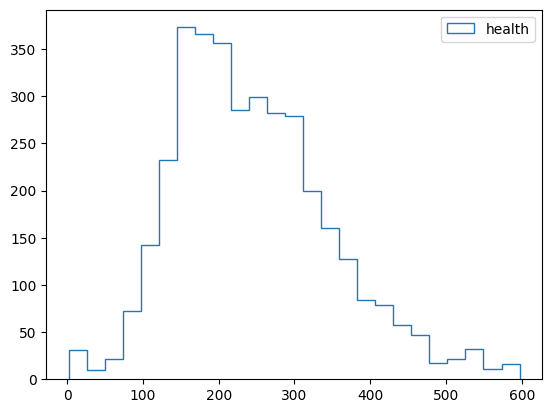

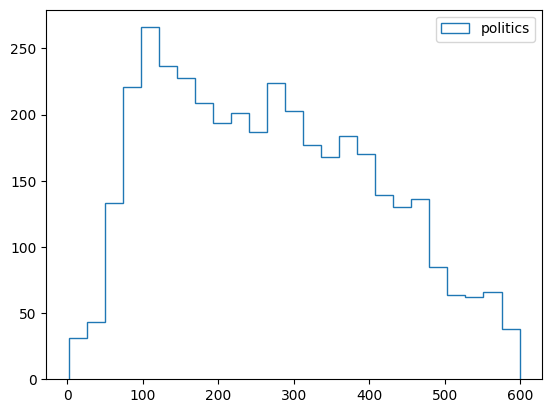

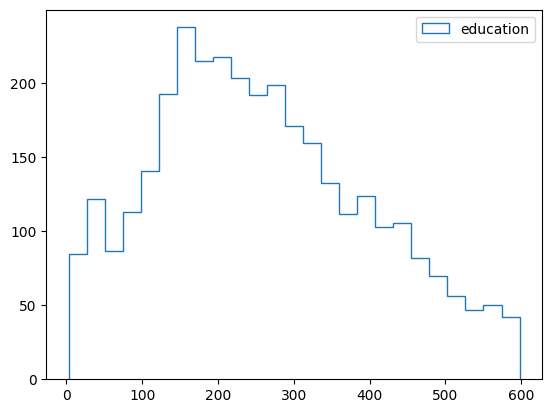

In [23]:
visualier.hist_length("Content_cleaned")

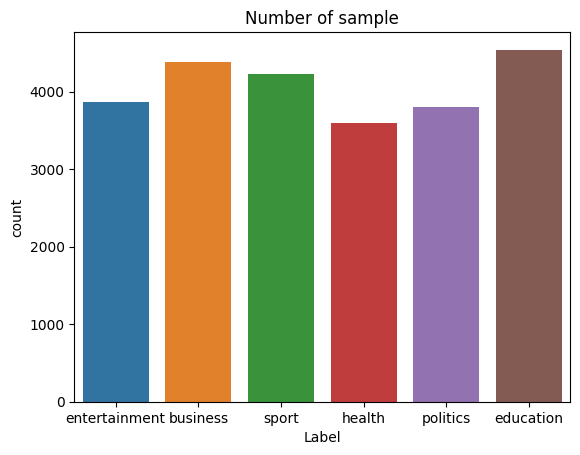

In [29]:
visualier.hist_samples()

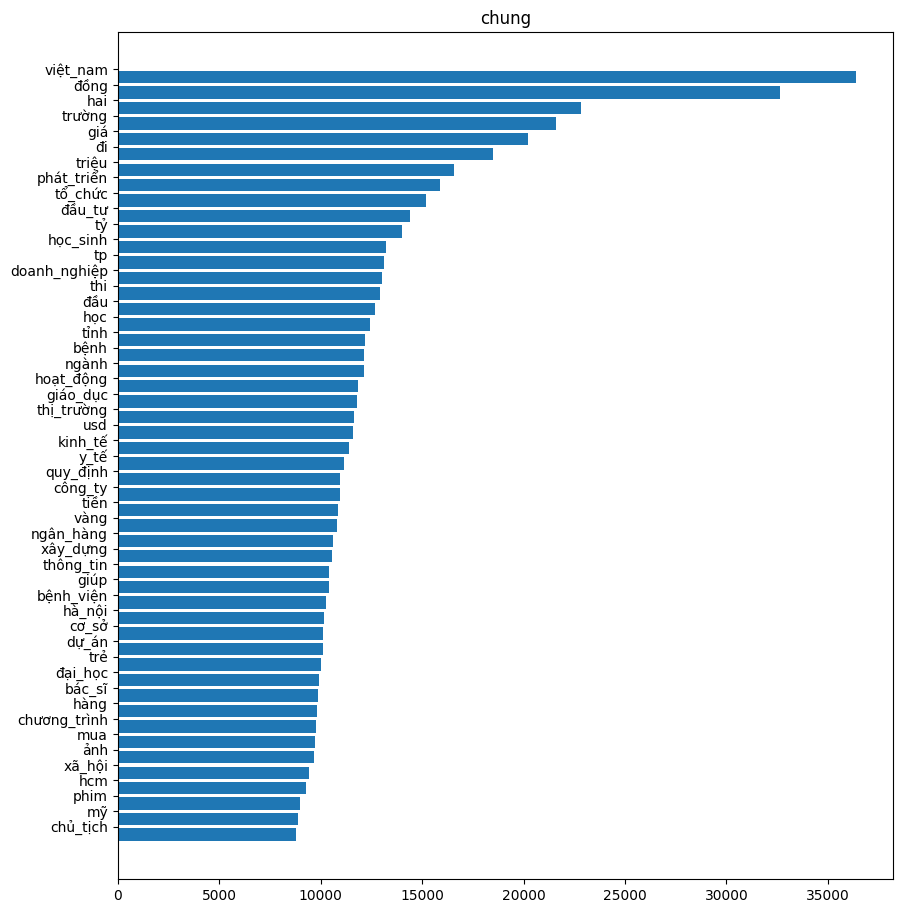

In [25]:
visualier.wordBarGraphFunction("Content_cleaned", True)
# topic_words = [z.lower() for y in
#                      [x.split()
#                       for x in data["Content_cleaned"] if isinstance(x, str)]
#                      for z in y]
#       word_count_dict = dict(Counter(topic_words))
#       popular_words = sorted(
#           word_count_dict, key=word_count_dict.get, reverse=True)
#       popular_words_nonstop = [w for w in popular_words]
#       plt.figure(figsize=(10, 11))
#       plt.barh(range(50), [word_count_dict[w]
#                            for w in reversed(popular_words_nonstop[0:50])])
#       plt.yticks([x + 0.5 for x in range(50)],
#                  reversed(popular_words_nonstop[0:50]))
#       plt.title("chung")

#       plt.show()

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a toy corpus
# corpus = ['this is document one', 'this is document two', 'this is document three', 'this is document four', 'this is document five']

# Create a CountVectorizer object and fit it to the corpus
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Content_cleaned"])

# Get the vocabulary and document frequency (df) for each term
vocab = vectorizer.vocabulary_
df = X.sum(axis=0)

# Calculate the max_df threshold (e.g., 0.8)
max_df = 0.8 * len(data["Content_cleaned"])
min_df = 2
# Get the list of terms that exceed the max_df threshold
max_df_terms = [term for term in vocab if df[0, vocab[term]] > max_df]
min_df_terms = [term for term in vocab if df[0, vocab[term]] < min_df]



In [8]:
len(min_df_terms), len(max_df_terms), len(vocab)

(31095, 3, 71483)

In [ ]:
new_docs = []
for doc in data["Content_clean2"]:
  new_doc = " ".join([word for word in doc.split() if word not in min_df_terms])
  new_docs.append(new_doc)
data["content_3"] = new_docs

In [ ]:
data["Length3_remove_mindf"] = data["content_3"].apply(lambda doc: len(str(doc).split()))

<AxesSubplot:ylabel='Density'>

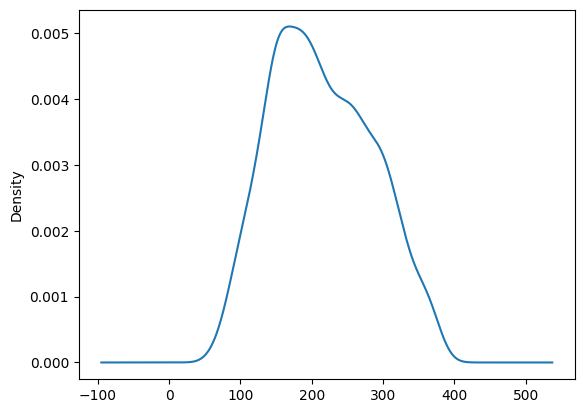

In [14]:
data[data["Label"]=="health"]["Length_content_cleaned"].plot.kde()

<AxesSubplot:ylabel='Density'>

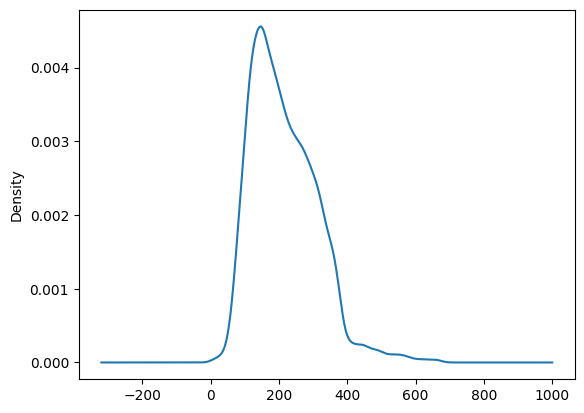

In [13]:
data["Length_content_cleaned"].plot.kde()

<AxesSubplot:>

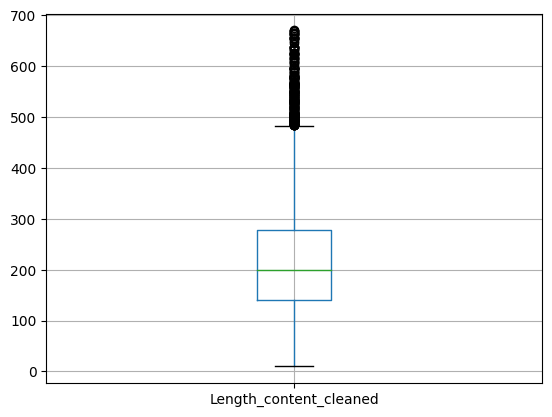

In [12]:
data.boxplot("Length_content_cleaned")